In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
import numpy as np
import pandas as pd
import geopandas
from shapely.geometry import Point

In [13]:
df = pd.read_csv("data/zomato_df_final_data.csv")

In [14]:
df.head(2)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b


In [15]:
df.dtypes

address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object

In [16]:
df.isna().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

# How many unique cuisines do sydney restaurants have?

In [17]:
df["cuisine"].dtype
#dtype("0") means object

dtype('O')

In [18]:
temp = df["cuisine"][0]
temp
# string

"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']"

# Instead of using literal eval, i can use regex to get rid of square brackes, comma and leading space

In [19]:
import re
# store all cusines in a set
cuisines = set()

#custom function to check all the values
def get_cuisine(str):
    pattern = r',\s*' #removing comma(,) followed by immediate space
    cleaned_text = re.sub(pattern, '-', str)
    pattern2 = r'[\'\[\],]'
    cleaned_text = re.sub(pattern2, "", cleaned_text)
    temp = cleaned_text.split("-")
    for cuisine in temp:
        cuisines.add(cuisine)

# Sydney restaurants sell the following number of cuisines

In [20]:
for value in df["cuisine"]:
    get_cuisine(value)
len(cuisines)

135

# Restaurants in each suburb

In [21]:
top_3 = df["subzone"].value_counts().sort_values(ascending=False).head(3)
top_3

subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64

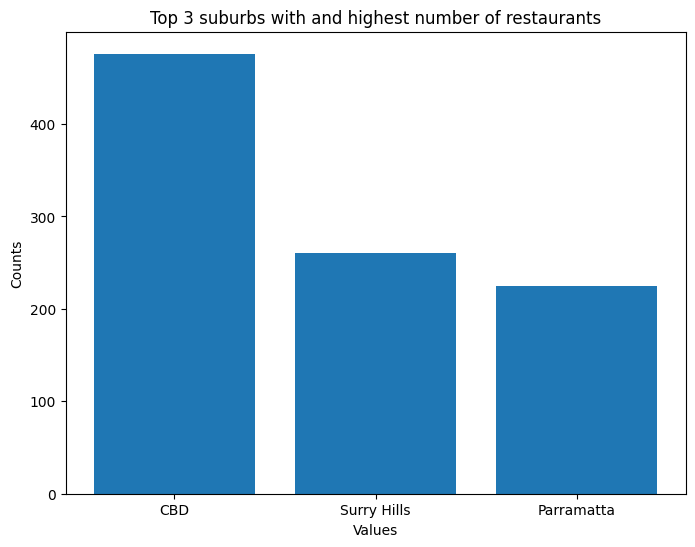

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(top_3.index, top_3.values)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Top 3 suburbs with and highest number of restaurants')
plt.show()

# Cost vs rating

In [23]:
cost_rating = df[["cost", "rating_text"]]
cost_rating.dtypes

cost           float64
rating_text     object
dtype: object

In [24]:
result_df = df.groupby('rating_text')['cost'].mean().reset_index()
result_df.columns = ['rating', 'average_cost']
result_df = result_df.sort_values(by='average_cost', ascending=False)
result_df

,rating,average_cost
1,Excellent,101.666667
4,Very Good,71.515810
2,Good,59.528114
3,Poor,55.845771
0,Average,51.021267


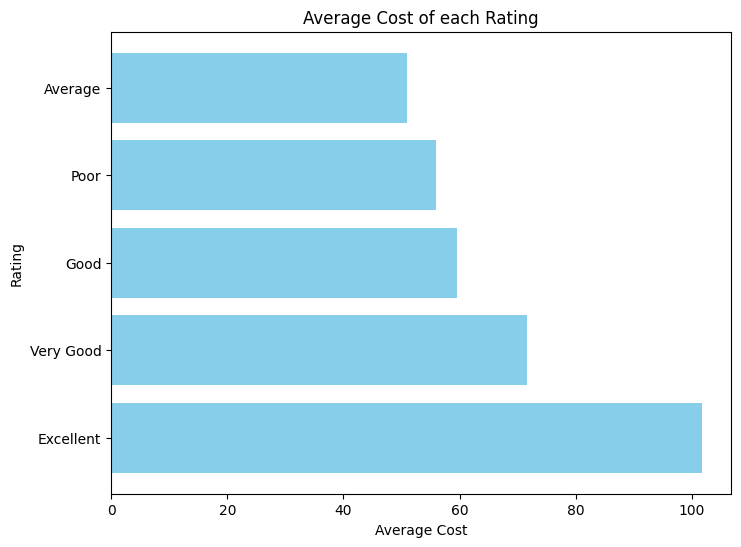

In [25]:
plt.figure(figsize=(8, 6))
plt.barh(result_df['rating'], result_df['average_cost'], color='skyblue')

plt.xlabel('Average Cost')
plt.ylabel('Rating')
plt.title('Average Cost of each Rating')
plt.show()

The bar chart above clearly shows restaurant with "Excellent" ratings are usually most expensive. On the other hand "poor" rating restaurants are rarely expensive

# Exploratory analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [27]:
categorical = [var for var in df.columns if df[var].dtype=='O']
numerical = [col for col in df.columns.tolist() if col not in categorical]
categorical, numerical

(['address',
  'cuisine',
  'link',
  'phone',
  'rating_text',
  'subzone',
  'title',
  'type',
  'color',
  'cuisine_color'],
 ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2'])

# Categorical

In [28]:
df[categorical].head(2)

,address,cuisine,link,phone,rating_text,subzone,title,type,color,cuisine_color
0,"371A Pitt Street, CBD, Sydney","['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",https://www.zomato.com/sydney/sydney-madang-cbd,02 8318 0406,Very Good,CBD,Sydney Madang,['Casual Dining'],#e15307,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney","['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",https://www.zomato.com/sydney/the-grounds-of-a...,02 9699 2225,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],#9c3203,#6f706b


In [29]:
cat_with_missing = [var for var in categorical if df[var].isnull().sum() > 0]
df[cat_with_missing].isnull().sum()

rating_text    3316
type             48
dtype: int64

In [30]:
for var in categorical:
    us = df[var].unique()
    print(var, ' contains ', len(us), ' labels.')

address  contains  9821  labels.
cuisine  contains  1759  labels.
link  contains  10499  labels.
phone  contains  9638  labels.
rating_text  contains  6  labels.
subzone  contains  572  labels.
title  contains  10407  labels.
type  contains  67  labels.
color  contains  33  labels.
cuisine_color  contains  5  labels.


# Type

In [31]:
type(df["type"][0])

str

In [32]:
df["type"].isna().sum()

48

In [33]:
import re
types = set()
def get_type(str):
    pattern = r',\s*'
    cleaned_text = re.sub(pattern, '-', str)
    pattern2 = r'[\'\[\],]'
    cleaned_text = re.sub(pattern2, "", cleaned_text)
    temp = cleaned_text.split("-")
    for type in temp:
        types.add(type)

In [34]:
# getting rid of Nas in type
temp = df.dropna(subset = ["type"], inplace = True)
for value in df["type"]:
    get_type(value)
len(types)

14

# Sydney offers 14 types of restaurants, and they are - 

In [35]:
types

{'Bakery',
 'Bar',
 'Beverage Shop',
 'Café',
 'Casual Dining',
 'Club',
 'Dessert Parlour',
 'Fast Food',
 'Fine Dining',
 'Food Court',
 'Food Stall',
 'Food Truck',
 'Pub',
 'Wine Bar'}

# Numeric

In [36]:
df[numerical].head(2)

,cost,lat,lng,rating_number,votes,groupon,cost_2
0,50.0,-33.876059,151.207605,4.0,1311.0,False,5.243902
1,80.0,-33.910999,151.193793,4.6,3236.0,False,7.560976


In [37]:
df[numerical].isnull().sum()

cost              338
lat               192
lng               192
rating_number    3289
votes            3289
groupon             0
cost_2            338
dtype: int64

In [38]:
df[numerical].describe()

,cost,lat,lng,rating_number,votes,cost_2
count,10114.000000,10260.000000,10260.000000,7163.000000,7163.000000,10114.000000
mean,51.232747,-32.916972,148.053262,3.283736,83.639816,5.339115
std,27.816523,8.282503,26.756980,0.454518,175.260665,2.148431
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899089,151.061266,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172532,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208957,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


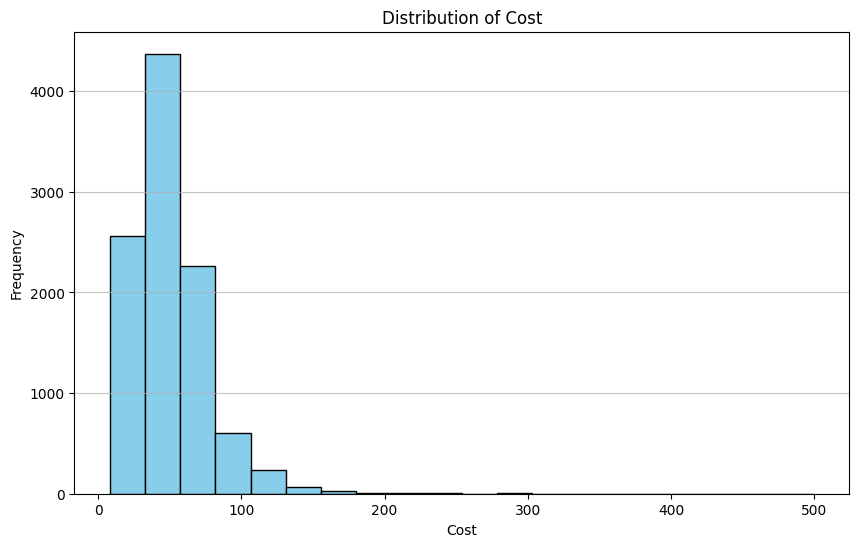

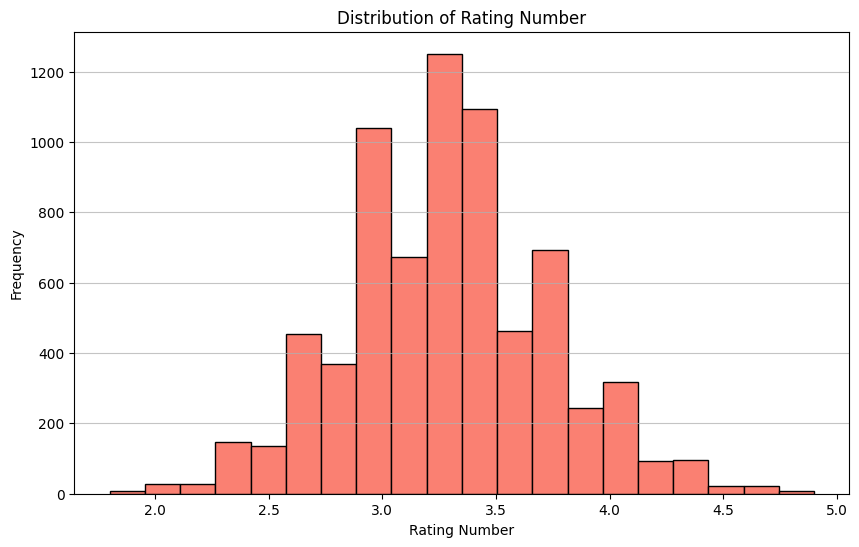

Descriptive Statistics for 'cost':
count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64

Descriptive Statistics for 'rating_number':
count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


In [244]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["cost"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Cost")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["rating_number"], bins=20, color='salmon', edgecolor='black')
plt.title("Distribution of Rating Number")
plt.xlabel("Rating Number")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()


cost_description = df["cost"].describe()
rating_number_description = df["rating_number"].describe()

print("Descriptive Statistics for 'cost':")
print(cost_description)

print("\nDescriptive Statistics for 'rating_number':")
print(rating_number_description)
